# **Departamentos en Venta (2015): Aproximación analítica al mercado inmobiliario**


# *1. Objetivo*

Describir y caracterizar desde distintas aristas la composición y desenvolvimiento del mercado inmobiliario para el período 2015 en el ámbito de la Ciudad de Buenos Aires, particularmente en lo que respecta a los factores causales de los precios de mercado vigentes. Se parte de la premisa de que aspectos como la ubicación geográfica, el tamaño, la presencia de cochera y la orientación son algunos de los factores que ejercen una marcada influencia en la cotización de las propiedades.


# *2. Hipótesis*

La principal hipótesis de esta presentación versará en que la ubicación en ciertas comunas (1, 2, 13, y 14), el mayor tamaño en M2, la presencia de cochera y la orientación frontal son factores que elevan el valor de las propiedades publicadas.

# *3. Alcance. Motivación y Audiencia*

Este trabajo ofrece una descripción del mercado inmobiliario de Buenos Aires, destacando los factores que influyen en la valorización de los departamentos. Su objetivo es proporcionar un análisis estratégico que apoye la toma de decisiones en el sector público y el inmobiliario.

Identificar y clasificar las características que aumentan el valor de los departamentos ayudará a las empresas desarrolladoras a orientar sus proyectos para obtener mayores beneficios económicos. Además, este análisis busca asesorar a las autoridades municipales en la promoción de un desarrollo urbano más sustentable y equitativo.

# *4. Data Acquisition*



In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/gdrive')

url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQKbTyPklCPJqxogG9glS-XftmX8p4PVvKxpODX3_51KJ-EoKIy9VRTCzJrZOXxEg/pub?output=xlsx'

df = pd.read_excel(url)

df.head()

Mounted at /content/gdrive


,ID,Calle,Número,Cantidad de M2,Precio,Precio M2,Ambientes,A Estrenar,Orientación,Cochera,Web Publicación,Barrio,Comuna,Cotización,Dimensión,Zona
0,1,11 DE SEPTIEMBRE DE 1888,900,350,880000,2514.3,4,NO,FRENTE,SI,ZONAPROP,PALERMO,14,MEDIANA,GRANDE,NORTE
1,2,11 DE SEPTIEMBRE DE 1888,1100,200,545000,2726.2,5,NO,FRENTE,SI,ZONAPROP,PALERMO,14,MEDIANA,GRANDE,NORTE
2,3,11 DE SEPTIEMBRE DE 1888,1300,350,1490000,4257.1,5,NO,FRENTE,SI,ZONAPROP,PALERMO,14,CARA,GRANDE,NORTE
3,4,11 DE SEPTIEMBRE DE 1888,1400,255,780000,3058.8,5,NO,FRENTE,SI,ZONAPROP,PALERMO,14,CARA,GRANDE,NORTE
4,5,11 DE SEPTIEMBRE DE 1888,1600,200,1100000,5500.0,4,NO,FRENTE,SI,ZONAPROP,BELGRANO,13,CARA,GRANDE,NORTE


# *5. Data Wrangling*

# *5.1 Preselección*

In [ ]:
import pandas as pd

columnas_seleccionadas = ['Cantidad de M2','Dimensión','Ambientes', 'Precio','Precio M2', 'A Estrenar', 'Orientación', 'Cochera','Barrio', 'Comuna','Cotización', 'Zona']
df = df[columnas_seleccionadas].copy()

df.head()

,Cantidad de M2,Dimensión,Ambientes,Precio,Precio M2,A Estrenar,Orientación,Cochera,Barrio,Comuna,Cotización,Zona
0,350,GRANDE,4,880000,2514.3,NO,FRENTE,SI,PALERMO,14,MEDIANA,NORTE
1,200,GRANDE,5,545000,2726.2,NO,FRENTE,SI,PALERMO,14,MEDIANA,NORTE
2,350,GRANDE,5,1490000,4257.1,NO,FRENTE,SI,PALERMO,14,CARA,NORTE
3,255,GRANDE,5,780000,3058.8,NO,FRENTE,SI,PALERMO,14,CARA,NORTE
4,200,GRANDE,4,1100000,5500.0,NO,FRENTE,SI,BELGRANO,13,CARA,NORTE


# *5.2 Borrado de duplicados*

In [ ]:
print(df.shape)
train= df.drop_duplicates()
print(df.shape)

(8979, 12)
(8979, 12)


# *5.3 Análisis de nulos*

In [ ]:
pd.set_option('display.max_rows', None)
serie=(df.isnull().sum()/train.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

Series([], dtype: float64)

Afortunadamente, el dataset recibido no ha presentado valores duplicados ni nulos. Por lo tanto, no será menester profundizar en estos aspectos en el EDA.

# *5.4 Tipo de dato de las variables*

In [ ]:
print(df.dtypes)

Cantidad de M2      int64
Dimensión          object
Ambientes           int64
Precio              int64
Precio M2         float64
A Estrenar         object
Orientación        object
Cochera            object
Barrio             object
Comuna             object
Cotización         object
Zona               object
dtype: object


Se observa que Comuna es procesada como variable cuantitativa, no obstante no debería serlo. Es menester ajustar los tipos de datos antes de proseguir con el EDA. Realizamos las correcciones pertinentes.

In [ ]:
df['Comuna'] = df['Comuna'].astype('object')

print(df.dtypes)

Cantidad de M2      int64
Dimensión          object
Ambientes           int64
Precio              int64
Precio M2         float64
A Estrenar         object
Orientación        object
Cochera            object
Barrio             object
Comuna             object
Cotización         object
Zona               object
dtype: object


# *5.5 Anomalías*

In [ ]:
import numpy as np
import pandas as pd

def buscar_anomalias(data):
    anomalias = {}

    numericas = data.select_dtypes(include=[np.number])

    for column in numericas.columns:

        desvio = numericas[column].std()
        media = numericas[column].mean()
        punto_corte = desvio * 2
        limite_inf = media - punto_corte
        limite_sup = media + punto_corte

        contador = 0

        for index, value in data[column].items():
            if (value > limite_sup) or (value < limite_inf):
                contador += 1

        anomalias[column] = contador

    return anomalias

anomalias = buscar_anomalias(df)

print("\nTotal de anomalías por columna:")
for column, count in anomalias.items():
    print(column, ":", count)


Total de anomalías por columna:
Cantidad de M2 : 420
Ambientes : 70
Precio : 307
Precio M2 : 359


# *6. Exploratory Data Analysis (EDA)*

## *6.1 Exploración preliminar del dataset*

### *6.1.1 Cantidad de filas y columnas*

In [ ]:
print ("Cantidad de filas y columnas: ", df.shape)

Cantidad de filas y columnas:  (8979, 16)


### *6.1.2 Nomenclatura de las columnas*

In [ ]:
print("Nombre de las columnas: ", df.columns)

Nombre de las columnas:  Index(['Cantidad de M2', 'Dimensión', 'Ambientes', 'Precio', 'Precio M2',
       'A Estrenar', 'Orientación', 'Cochera', 'Barrio', 'Comuna',
       'Cotización', 'Zona'],
      dtype='object')


Aquí observamos que el dataset, atravesada la instancia de Data Wrangling, cuenta aún con una cantidad considerable de filas y columnas, lo cual debería permitirnos encarar un estudio bastante robusto sobre el tema.

# *6.2 Comportamiento individual de las variables (cuantitativas)*

## *6.2.1 Medidas de tendencia central, de localización y de dispersión*



## Media, desvío, percentiles

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe()

,Cantidad de M2,Ambientes,Precio,Precio M2
count,8979.000,8979.000,8979.000,8979.000
mean,92.115,2.723,215530.938,2240.213
std,70.475,1.181,260831.011,840.156
min,10.000,1.000,28100.000,421.000
25%,48.000,2.000,95000.000,1744.200
50%,70.000,3.000,141000.000,2100.000
75%,110.000,3.500,228000.000,2551.500
max,850.000,10.000,5250000.000,12000.000


La media en M2 es 92, un 10,8% del metraje máximo (850). La mediana es 70, con una desviación estándar de 70.

La media en Precio es 215.000 dólares, menos del 5% del valor máximo (4.500.000 dólares). La mediana es inferior a la media, con una desviación estándar en torno a 215.000 dólares.

En Precio M2 y Cantidad de Ambientes, las desviaciones estándar son menores y las diferencias entre media y mediana son menos significativas.

## Moda

In [ ]:
import pandas as pd
from scipy import stats

for columna in df.columns:
    if pd.api.types.is_numeric_dtype(df[columna]):
        moda = stats.mode(df[columna])
        moda = moda.mode
        print(f"La moda de la variable {columna} es: {moda}")

La moda de la variable Cantidad de M2 es: 50
La moda de la variable Ambientes es: 3
La moda de la variable Precio es: 120000
La moda de la variable Precio M2 es: 2000.0


_ La moda de 'Cantidad de M2', de 50, es bastante inferior a su media de 92 metros. Esto viene a marcar una asimetría positiva.

_ Igualmente, la moda de 'Precio' (de 120.000 dólares) es por mucho inferior a la media de 215.000, denotando nuevamente asimetría positiva.

_ La moda de 'Precio M2' arroja un valor de 2000 dólares, levemente inferior a la media de 2240 dólares. Esto marca una leve asimetría positiva.

_ La moda de 'Ambientes' iguala a la mediana en 3, siendo superior a la media de 2,7. Esta variable se comporta similarmente a una simetría.

## Asimetría

In [ ]:
import pandas as pd
from scipy.stats import skew


for columna in df.columns:
    if pd.api.types.is_numeric_dtype(df[columna]):
        asimetria = skew(df[columna])
        print(f"La asimetría de la variable {columna} es: {asimetria}")

La asimetría de la variable Cantidad de M2 es: 2.811114536919886
La asimetría de la variable Ambientes es: 0.3973945891815999
La asimetría de la variable Precio es: 6.279775392534225
La asimetría de la variable Precio M2 es: 2.3380101182408417


_ Se refrenda la muy alta asimetría positiva en 'Precio', y las asimetrías igualmente positivas pero menos marcadas en 'Cantidad de M2' y 'Precio M2'.

_ Sorpresivamente, la variable 'Ambientes' (que exponía una moda superior en valor a la media aritmética) también marca una muy leve asimetría positiva, aunque corrobora una aproximación a la simetría.

# *6.2.2 Análisis de distribución*

## Precio y Precio por M2

Precio y Precio por M2 serán variables objetivo recurrentes durante la investigación. ¿Cómo se distribuyen?


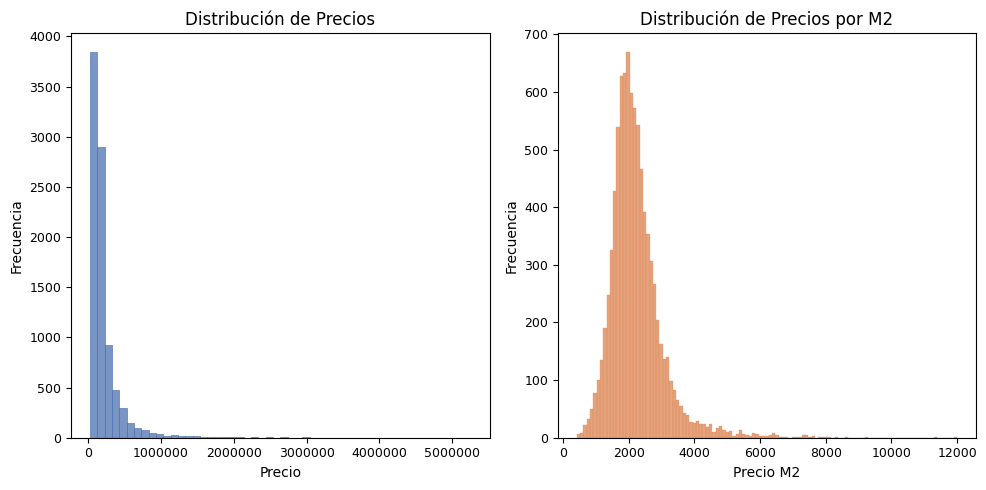

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("deep")

precio_rango = max(df['Precio']) - min(df['Precio'])
precio_m2_rango = max(df['Precio M2']) - min(df['Precio M2'])
bins_precio = int(precio_rango/100000)
bins_precio_m2 = int(precio_m2_rango/100)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.histplot(df['Precio'], bins=bins_precio, color=palette[0], edgecolor=palette[0], ax=axs[0])
axs[0].set_title('Distribución de Precios')
axs[0].set_xlabel('Precio')
axs[0].set_ylabel('Frecuencia')
axs[0].ticklabel_format(style='plain', axis='x')
axs[0].grid(False)
axs[0].tick_params(axis='x', labelsize=9)
axs[0].tick_params(axis='y', labelsize=9)

sns.histplot(df['Precio M2'], bins=bins_precio_m2, color=palette[1], edgecolor=palette[1], ax=axs[1])
axs[1].set_title('Distribución de Precios por M2')
axs[1].set_xlabel('Precio M2')
axs[1].set_ylabel('Frecuencia')
axs[1].grid(False)
axs[1].tick_params(axis='x', labelsize=9)
axs[1].tick_params(axis='y', labelsize=9)

plt.tight_layout()

plt.show()

Los valores muestran una distribución con mayoría concentrada hasta los $300,000 y pocos superando el millón de dólares.

El precio por M2 se encuentra mayoritariamente entre 2.000 y 3.000 dólares, siendo excepcionales los casos superiores a 5.000.

Ambas distribuciones son asimétricas hacia la derecha, reflejando la minoría de las propiedades más caras.

## M2 y Ambientes

¿Cómo se distribuyen las propiedades cotejadas al considerarlas según su tamaño en M2, y por cantidad de ambientes?

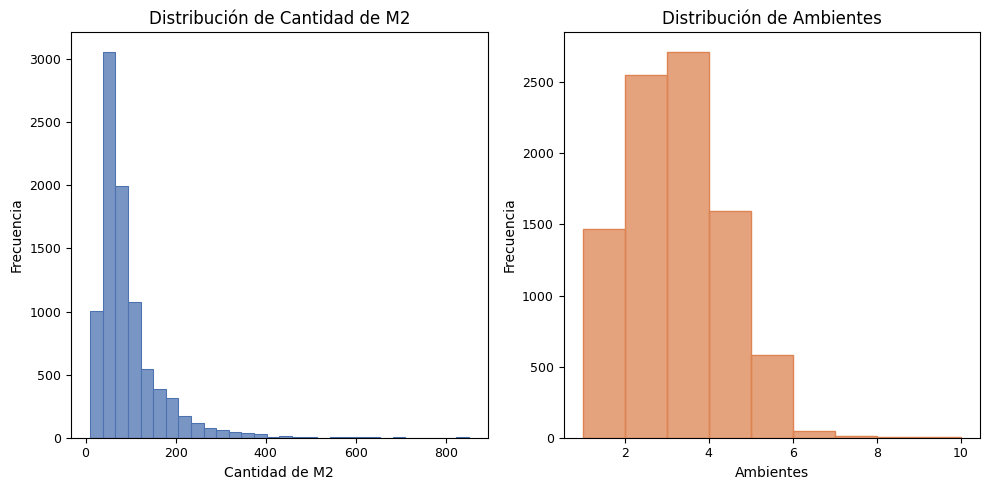

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("deep")

bins_cantidad_m2 = 30
bins_ambientes = max(1, int(max(df['Ambientes']) - min(df['Ambientes'])))

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.histplot(df['Cantidad de M2'], bins=bins_cantidad_m2, color=palette[0], edgecolor=palette[0], ax=axs[0])
axs[0].set_title('Distribución de Cantidad de M2')
axs[0].set_xlabel('Cantidad de M2')
axs[0].set_ylabel('Frecuencia')
axs[0].grid(False)
axs[0].tick_params(axis='x', labelsize=9)
axs[0].tick_params(axis='y', labelsize=9)

sns.histplot(df['Ambientes'], bins=bins_ambientes, color=palette[1], edgecolor=palette[1], ax=axs[1])
axs[1].set_title('Distribución de Ambientes')
axs[1].set_xlabel('Ambientes')
axs[1].set_ylabel('Frecuencia')
axs[1].grid(False)
axs[1].tick_params(axis='x', labelsize=9)
axs[1].tick_params(axis='y', labelsize=9)

plt.tight_layout()
plt.show()

El tamaño en M2 muestra una moda de 50 M2 y una gran concentración de casos hasta 100 M2, indicando una asimetría positiva.

La cantidad de Ambientes tiene una moda de 3, con mayoría de casos entre 2 y 3 ambientes, mostrando un comportamiento casi simétrico.

## Dimensión

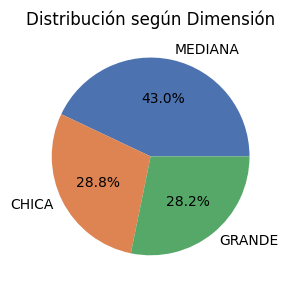

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))

palette = sns.color_palette("deep")

distribucion = df['Dimensión'].value_counts()
categorias = distribucion.index.tolist()
valores = distribucion.tolist()

colors = [palette[i % len(palette)] for i in range(len(categorias))]

ax.pie(valores, labels=categorias, autopct='%1.1f%%', colors=colors)
ax.set_title('Distribución según Dimensión')
plt.tight_layout()
plt.show()

Podemos observar una supremacía de los casos de propiedades Medianas, seguidas por un reparto parejo entre Chicas y Grandes. En todo caso, hay una presencia considerable de todas las categorías.

## Ambientes

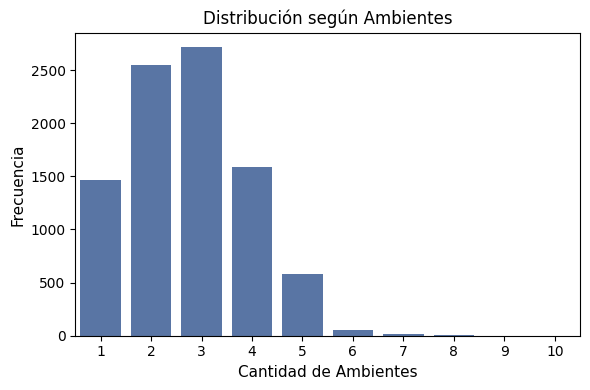

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.color_palette("deep")

frecuencia_ambientes = df['Ambientes'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
ax= sns.barplot(x=frecuencia_ambientes.index, y=frecuencia_ambientes.values, color=palette[0])

plt.title('Distribución según Ambientes', fontsize=12)
plt.xlabel('Cantidad de Ambientes', fontsize=11)
plt.ylabel('Frecuencia', fontsize=11)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.tight_layout()
plt.show()

Concluimos que la cantidad de ambientes se concentra entre los 2 y 3 ambientes. Por su parte, los casos a partir de los 6 ambientes es tan poco significativa que no debería ser tenida en cuenta.

## Zona

¿Cómo se distribuyen los departamentos en función a su ubicación?

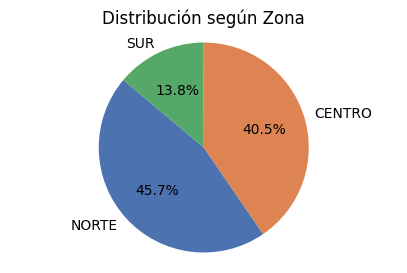

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("deep")

frecuencia_comuna = df['Zona'].value_counts()

plt.figure(figsize=(5, 3))
plt.pie(frecuencia_comuna, labels=frecuencia_comuna.index, autopct='%1.1f%%', startangle=140, colors=palette)
plt.title('Distribución según Zona')

plt.axis('equal')
plt.show()

Hay un reparto parejo de casos entre las zonas Norte y Centro, pero la zona Sur queda marcadamente rezagada. Si bien la muestra roza los 9000 casos (lo cual da  margen analítico), no deberá perderse de vista en sucesivas conclusiones esta menor representación de la zona sur.

## Cochera, Orientación, "A Estrenar"

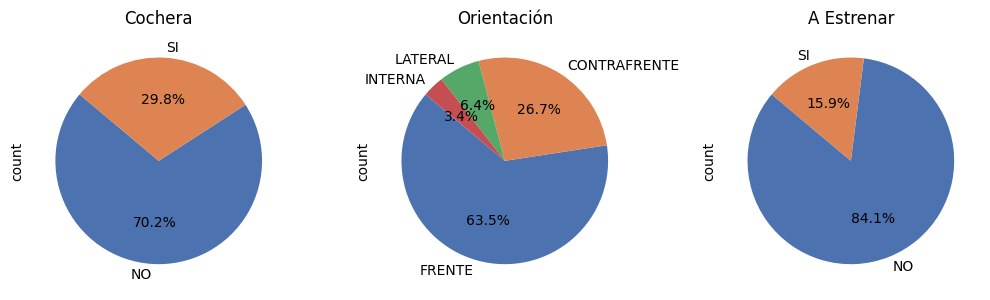

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.color_palette("deep")

fig, axes = plt.subplots(1, 3, figsize=(10, 5))

df['Cochera'].value_counts().plot.pie(ax=axes[0], autopct='%1.1f%%', startangle=140, colors=palette)
axes[0].set_title('Cochera', fontsize=12)

df['Orientación'].value_counts().plot.pie(ax=axes[1], autopct='%1.1f%%', startangle=140, colors=palette)
axes[1].set_title('Orientación', fontsize=12)

df['A Estrenar'].value_counts().plot.pie(ax=axes[2], autopct='%1.1f%%', startangle=140, colors=palette)
axes[2].set_title('A Estrenar', fontsize=12)

plt.tight_layout()

plt.show()

Observamos una mayoría de departamentos sin cochera (70%), de orientación frontal (63,5%) y no a estrenar (84%).

# *7. Relaciones entre las variables*

## *7.1 Correlación entre variables cuantitativas*


<ipython-input-7-d51809e41cd9>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + list(correlacion.columns), rotation=45)
<ipython-input-7-d51809e41cd9>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + list(correlacion.index))


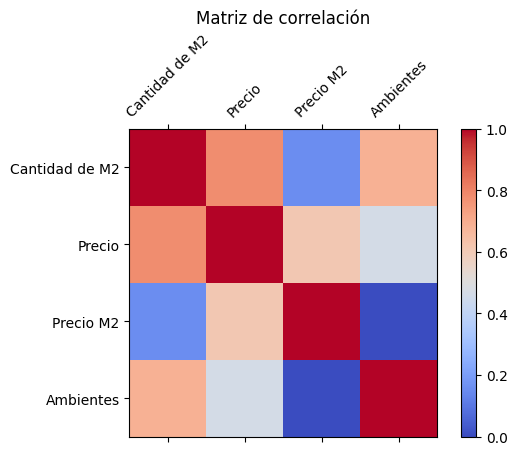

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

columnas_numericas = df.select_dtypes(include=['int64', 'float64'])

correlacion = columnas_numericas.corr()

fig, ax = plt.subplots(figsize=(6, 4))
cax = ax.matshow(correlacion, cmap='coolwarm')
fig.colorbar(cax)

ax.set_xticklabels([''] + list(correlacion.columns), rotation=45)
ax.set_yticklabels([''] + list(correlacion.index))

plt.title('Matriz de correlación')

plt.show()

El Precio de las propiedades muestra una correlación de 0.6 con el Precio por M2. Este dato sirve para observar que el Precio total se explica también por otros factores.

Se observa una alta correlación (0.8) entre el tamaño en M2 y el Precio de las propiedades. Sin embargo, la correlación entre el valor del M2 y la cantidad de M2 baja a 0.2.

La cantidad de ambientes tiene una correlación de 0.5 con el Precio de la propiedad, pero esta cae por debajo de 0.2 al considerar el Precio por M2, indicando que su influencia se debe más al aumento en tamaño que a una valoración específica de tener más ambientes.

---------------------------------------------------------------------------

## *7.2 Influencia del metraje en el precio de las propiedades*

¿Cuál es el comportamiento en el Precio de las propiedades en función del tamaño en M2? Este comportamiento, ¿se refrenda al considerar la cantidad de ambientes?

## Precio segun M2

<ipython-input-6-ebc2a5ec30cb>:8: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  scatterplot = sns.scatterplot(data=df, x='Precio', y='Cantidad de M2', hue='Dimensión', palette=palette, alpha=0.5)
<ipython-input-6-ebc2a5ec30cb>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  scatterplot.set_xticklabels(scatterplot.get_xticks(), size=9)
<ipython-input-6-ebc2a5ec30cb>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  scatterplot.set_yticklabels(scatterplot.get_yticks(), size=9)


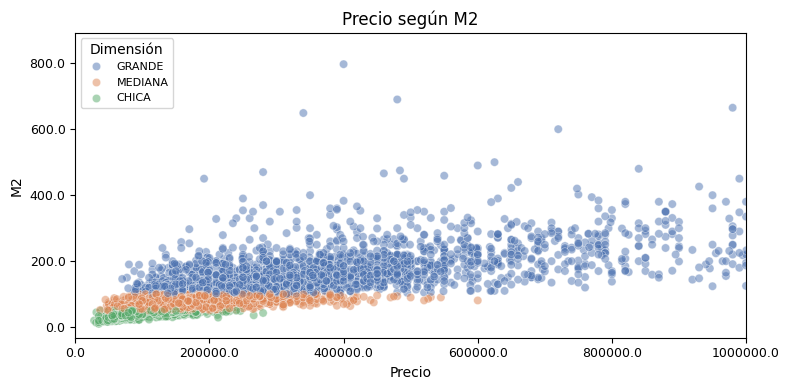

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.color_palette("deep")

plt.figure(figsize=(8, 4))
scatterplot = sns.scatterplot(data=df, x='Precio', y='Cantidad de M2', hue='Dimensión', palette=palette, alpha=0.5)

plt.xlabel('Precio', fontsize=10)
plt.ylabel('M2', fontsize=10)
plt.title('Precio según M2', fontsize=12)

plt.legend(title='Dimensión', fontsize=8)

plt.ticklabel_format(style='plain', axis='x')
plt.xlim(0, 1000000)

plt.grid(False)

scatterplot.set_xticklabels(scatterplot.get_xticks(), size=9)
scatterplot.set_yticklabels(scatterplot.get_yticks(), size=9)

plt.tight_layout()
plt.show()

Se observa una correlación entre el tamaño y el valor de las propiedades. Las propiedades pequeñas (hasta 50 M2) no superan los 300.000 dólares, y las medianas (hasta 100 M2) raramente superan los 500,000. Sin embargo, la presencia de valores que no siguen este patrón indica que deben considerarse otras variables independientes en el análisis.


## Precio según Dimensión

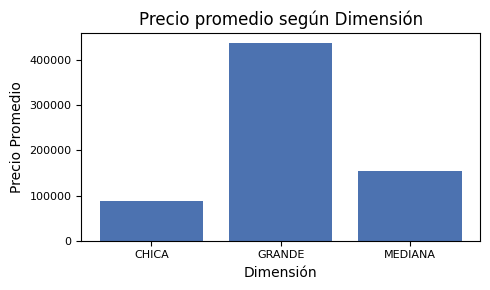

In [ ]:
import matplotlib.pyplot as plt

precio_dimension = df.groupby('Dimensión')['Precio'].mean()

fig, ax = plt.subplots(figsize=(5, 3))

color = sns.color_palette("deep")[0]

ax.bar(precio_dimension.index, precio_dimension, color=color)

ax.set_xlabel('Dimensión', fontsize=10)
ax.set_ylabel('Precio Promedio', fontsize=10)
ax.set_title('Precio promedio según Dimensión')
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)

ax.grid(False)

plt.tight_layout()
plt.show()

Se observa un diferencial notable en las propiedades grandes, que superan los 400.000 dólares. Las medianas rondan los 150.000 dólares y las chicas no alcanzan los 100.000. Este patrón de mayor precio con mayor tamaño es consistente. Aunque las propiedades grandes pueden estar influenciadas por outliers, el análisis de propiedades chicas y medianas también confirma este patrón.

## Distribución de Precios por Dimensión

<ipython-input-9-b5036fe1c0f5>:7: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  ax = sns.histplot(data=df, x='Precio', hue='Dimensión', multiple='stack', palette=palette)


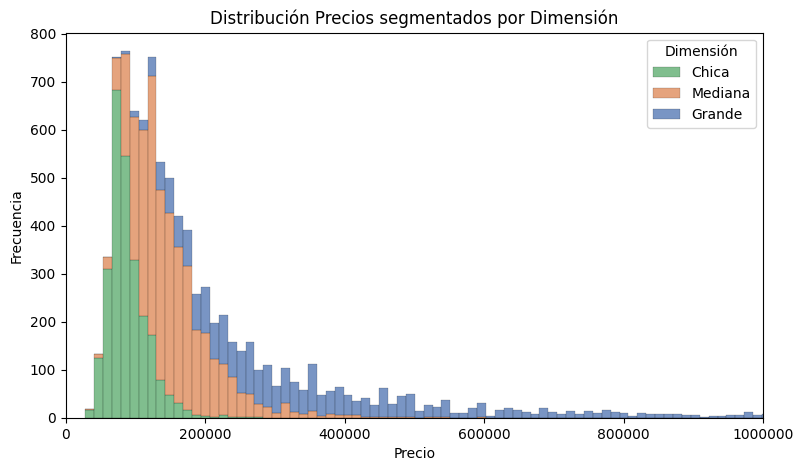

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.color_palette("deep")

plt.figure(figsize=(9, 5))
ax = sns.histplot(data=df, x='Precio', hue='Dimensión', multiple='stack', palette=palette)

plt.xlim(0, 1000000)
plt.ticklabel_format(style='plain', axis='x')

plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Distribución Precios segmentados por Dimensión')

labels = ['Chica', 'Mediana', 'Grande']

plt.legend(labels, title='Dimensión')
ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.show()

Se confirma el patrón previo, mostrando una fuerte influencia del tamaño en el valor de las propiedades. Las más chicas son comunes alrededor de los 100,000 dólares. Las medianas predominan hasta los 200,000. A partir de ese valor, sin propiedades chicas presentes, las grandes dominan la distribución.

## Precio por Ambientes

<ipython-input-10-2aa4a55ba4f4>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax= sns.lineplot(data=df, x='Ambientes', y='Precio', ci=None, color=palette[0])


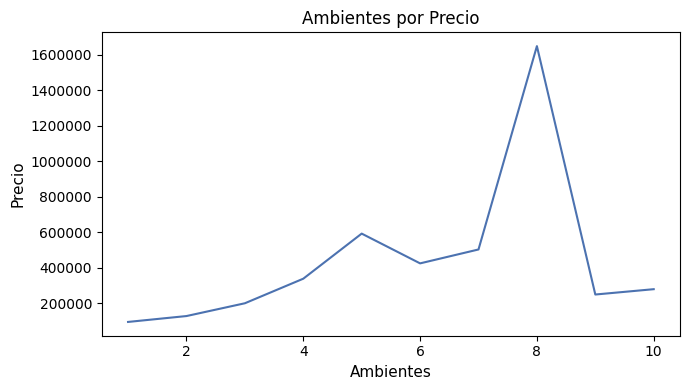

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.color_palette("deep")

plt.figure(figsize=(7, 4))
ax= sns.lineplot(data=df, x='Ambientes', y='Precio', ci=None, color=palette[0])

plt.title('Ambientes por Precio', fontsize=12)
plt.xlabel('Ambientes', fontsize=11)
plt.ylabel('Precio', fontsize=11)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.ticklabel_format(style='plain', axis='y')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.tight_layout()
plt.show()


La correlación se plasma entre los monoambientes y los 5 ambientes, y luego entre los 6 y los 8 ambientes, pero hay comportamientos llamativos entre los 5 y 6 ambientes, así como entre los 8 y 10 ambientes. No obstante, como ya observamos en el análisis univariado, esto se debe a la baja cantidad de casos para estas categorías, siendo que tal subreprentación afecta el normal comportamiento de estas categorías.

---------------------------------------------------------------------------

# *7.3 Influencia de la Ubicación en el Precio de las propiedades*

¿Se observan comportamientos diferenciales en el Precio de los departamentos al segmentarlos según ubicación?

## Precio por Comuna

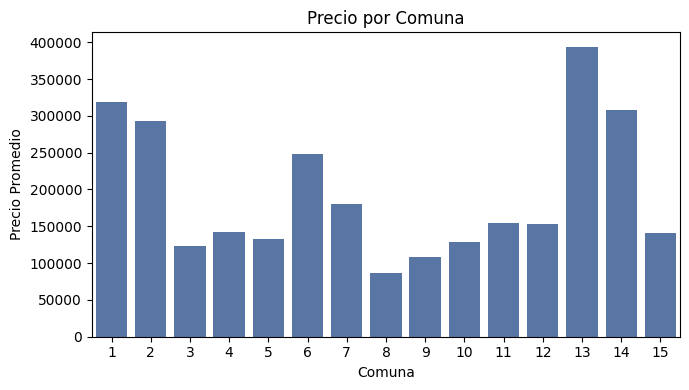

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

color = sns.color_palette("deep")[0]

precio_comuna = df.groupby('Comuna')['Precio'].mean().reset_index()

plt.figure(figsize=(7, 4))
ax=sns.barplot(data=precio_comuna, x='Comuna', y='Precio', color=color)

plt.title('Precio por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Precio Promedio')
ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.tight_layout()
plt.show()

Las comunas 1 (centro), 2, 13 y 14 (norte) rondan los 300.000 dólares, mientras que las comunas 3, 4, 5, 8, 9, 10, 11, 12 y 15 oscilan entre 100,000 y 150,000. En la zona sur, las comunas 8, 9 y 10 tienen los valores más bajos registrados. Las comunas del centro tienden a valores cercanos a 150.000 dólares, y las del norte, excepto la comuna 15, registran los valores más altos.

## Precio por Comuna segmentado por Dimensión

<ipython-input-15-2baa793332b2>:9: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  ax = sns.barplot(data=precio_comuna, x='Comuna', y='Precio', hue='Dimensión', palette=palette)


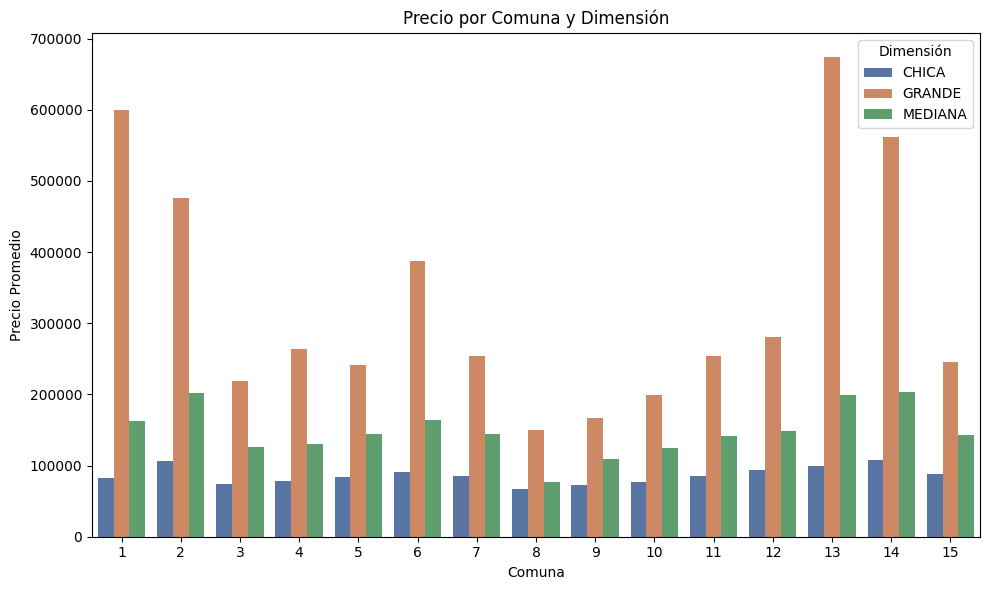

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.color_palette("deep")

precio_comuna = df.groupby(['Comuna', 'Dimensión'])['Precio'].mean().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=precio_comuna, x='Comuna', y='Precio', hue='Dimensión', palette=palette)

plt.title('Precio por Comuna y Dimensión')
plt.xlabel('Comuna')
plt.ylabel('Precio Promedio')
ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.tight_layout()
plt.show()

Las diferencias son leves entre las propiedades chicas en todas las comunas (con oscilaciones entre los 50 mil y 100 mil dólares), se acentúan entre las propiedades medianas (en la comuna 8, por ejemplo, no alcanzan los 100 mil dólares, pero tocan los 200 mil en las comunas 2, 13 y 14), en tanto la varianza se vuelve mucho más significativa en las propiedades grandes.

## M2 por Comuna

<ipython-input-17-76d7da27d726>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Comuna', y='Cantidad de M2', data=df, ci=None, color=color)


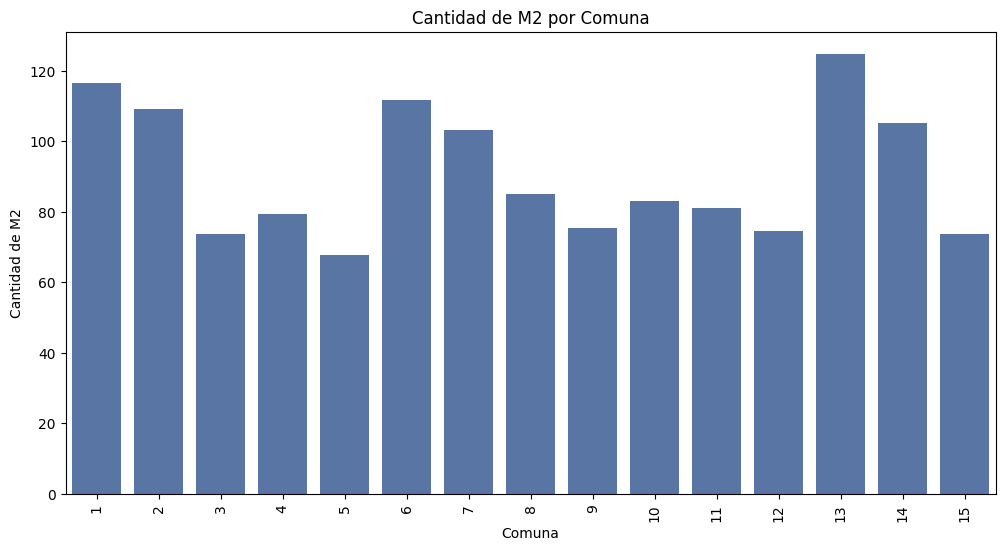

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

color = sns.color_palette("deep")[0]

plt.figure(figsize=(12, 6))

sns.barplot(x='Comuna', y='Cantidad de M2', data=df, ci=None, color=color)

plt.xticks(rotation=90)

plt.title('Cantidad de M2 por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de M2')

plt.show()

Podemos ver que algunas de las comunas mejor valuadas tienen además una media de metraje más alto, como es el caso de las comunas 1, 13 y 14. Si tomamos en cada caso otras comunas, veremos también cierta proporcionalidad, aunque no concluyente.

# *7.4 Influencia de otros factores*

Con respecto a otras características edilicias, como ser Orientación de la propiedad y presencia de Cochera, ¿Cómo se distribuyen las propiedades? ¿Cómo influyen en su valor? ¿Cómo valora el mercado los departamentos "A Estrenar"?

## Precio por Cochera, Orientación y "A Estrenar"

<ipython-input-19-c342a7a8dde0>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Cochera', y='Precio', estimator='mean', ci=None, ax=axes[0], color=palette[0])
<ipython-input-19-c342a7a8dde0>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Orientación', y='Precio', estimator='mean', ci=None, ax=axes[1], color=palette[1])
<ipython-input-19-c342a7a8dde0>:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='A Estrenar', y='Precio', estimator='mean', ci=None, ax=axes[2], color=palette[2])


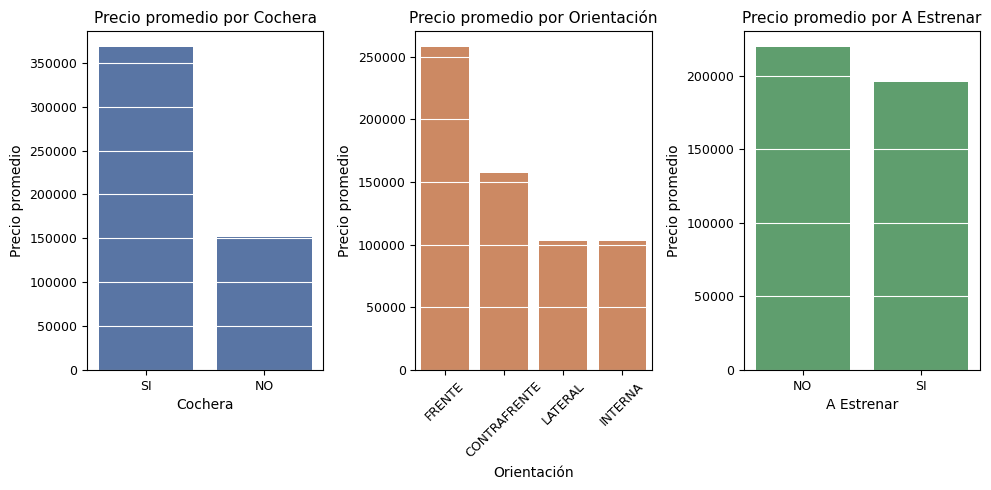

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.color_palette("deep")

fig, axes = plt.subplots(1, 3, figsize=(10, 5))

sns.barplot(data=df, x='Cochera', y='Precio', estimator='mean', ci=None, ax=axes[0], color=palette[0])
axes[0].set_title('Precio promedio por Cochera', fontsize=11)
axes[0].tick_params(axis='both', which='both', labelsize=9)
axes[0].grid(axis='y', color='white')
axes[0].set_xlabel('Cochera', fontsize=10)
axes[0].set_ylabel('Precio promedio', fontsize=10)

sns.barplot(data=df, x='Orientación', y='Precio', estimator='mean', ci=None, ax=axes[1], color=palette[1])
axes[1].set_title('Precio promedio por Orientación', fontsize=11)
axes[1].tick_params(axis='x', labelrotation=45, labelsize=9)
axes[1].tick_params(axis='y', labelsize=9)
axes[1].grid(axis='y', color='white')
axes[1].set_xlabel('Orientación', fontsize=10)
axes[1].set_ylabel('Precio promedio', fontsize=10)

sns.barplot(data=df, x='A Estrenar', y='Precio', estimator='mean', ci=None, ax=axes[2], color=palette[2])
axes[2].set_title('Precio promedio por A Estrenar', fontsize=11)
axes[2].tick_params(axis='both', which='both', labelsize=9)
axes[2].grid(axis='y', color='white')
axes[2].set_xlabel('A Estrenar', fontsize=10)
axes[2].set_ylabel('Precio promedio', fontsize=10)
plt.tight_layout()

plt.show()

La variable "Cochera" incrementa el precio promedio de las propiedades a 350.000 dólares (sin cochera es de 150.000). La orientación frontal también tiene un impacto importante, con un promedio de 250.000 dólares, frente a 150.000 para los contrafrentes y 100.000 para las orientaciones lateral e interna. Las propiedades no a estrenar promedian 210.000 dólares y las a estrenar, $190.000.

## Precio por Cochera, Orientación y "A Estrenar", segmentados por Dimensión

<ipython-input-24-a61fab385169>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Cochera', y='Precio', hue='Dimensión', estimator='mean', ci=None, ax=axes[0], palette=palette)
<ipython-input-24-a61fab385169>:8: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(data=df, x='Cochera', y='Precio', hue='Dimensión', estimator='mean', ci=None, ax=axes[0], palette=palette)
<ipython-input-24-a61fab385169>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Orientación', y='Precio', hue='Dimensión', estimator='mean', ci=None, ax=axes[1], palette=palette)
<ipython-input-24-a61fab385169>:15: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(data=df, x='Orientación', y='Precio', hue='Dimensión', estimator='mean', ci=None, ax=axes[1], palette

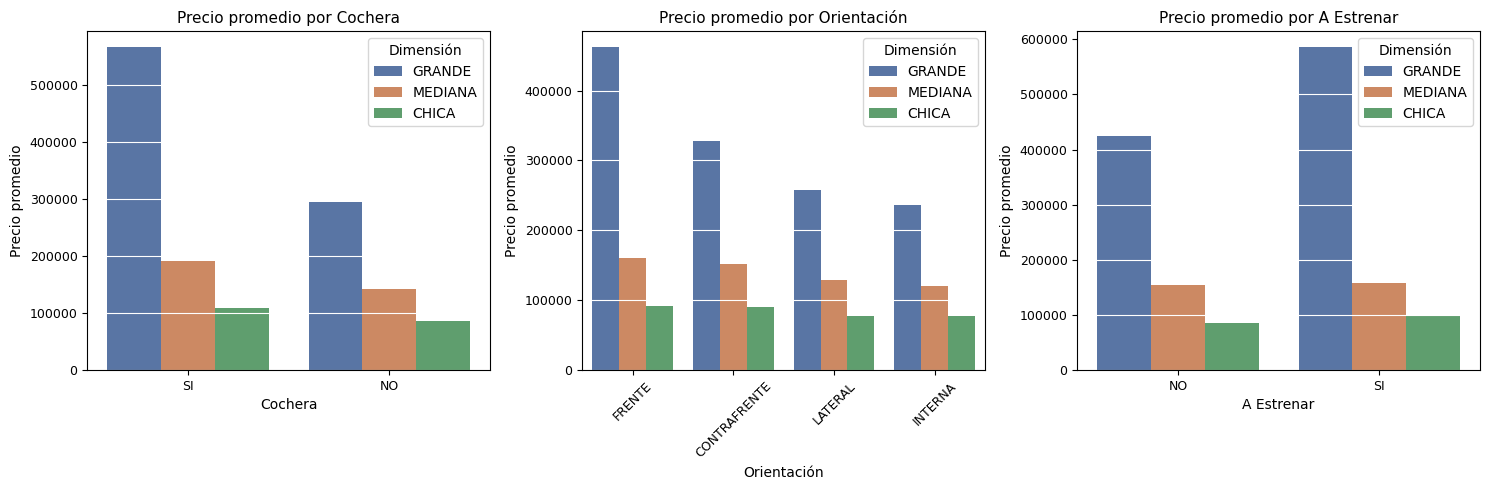

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.color_palette("deep")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(data=df, x='Cochera', y='Precio', hue='Dimensión', estimator='mean', ci=None, ax=axes[0], palette=palette)
axes[0].set_title('Precio promedio por Cochera', fontsize=11)
axes[0].tick_params(axis='both', which='both', labelsize=9)
axes[0].grid(axis='y', color='white')
axes[0].set_xlabel('Cochera', fontsize=10)
axes[0].set_ylabel('Precio promedio', fontsize=10)

sns.barplot(data=df, x='Orientación', y='Precio', hue='Dimensión', estimator='mean', ci=None, ax=axes[1], palette=palette)
axes[1].set_title('Precio promedio por Orientación', fontsize=11)
axes[1].tick_params(axis='x', labelrotation=45, labelsize=9)
axes[1].tick_params(axis='y', labelsize=9)
axes[1].grid(axis='y', color='white')
axes[1].set_xlabel('Orientación', fontsize=10)
axes[1].set_ylabel('Precio promedio', fontsize=10)

sns.barplot(data=df, x='A Estrenar', y='Precio', hue='Dimensión', estimator='mean', ci=None, ax=axes[2], palette=palette)
axes[2].set_title('Precio promedio por A Estrenar', fontsize=11)
axes[2].tick_params(axis='both', which='both', labelsize=9)
axes[2].grid(axis='y', color='white')
axes[2].set_xlabel('A Estrenar', fontsize=10)
axes[2].set_ylabel('Precio promedio', fontsize=10)

plt.tight_layout()
plt.show()

Nuevamente, el tamaño de la propiedad juega un rol influyente: cuánto más grande la propiedad, más se marca el diferencial en favor de las categorías que más favorecen el valor de las propiedades (tener cochera y orientación frontal). Dicho diferencial va reduciéndose a medida que los departamentos son más chicos.

## Metraje por Cochera, Orientación y "A Estrenar"

<ipython-input-27-547f511d1440>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Cochera', y='Cantidad de M2', estimator='mean', ci=None, ax=axes[0], color=color)
<ipython-input-27-547f511d1440>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Orientación', y='Cantidad de M2', estimator='mean', ci=None, ax=axes[1], color=color)
<ipython-input-27-547f511d1440>:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='A Estrenar', y='Cantidad de M2', estimator='mean', ci=None, ax=axes[2], color=color)


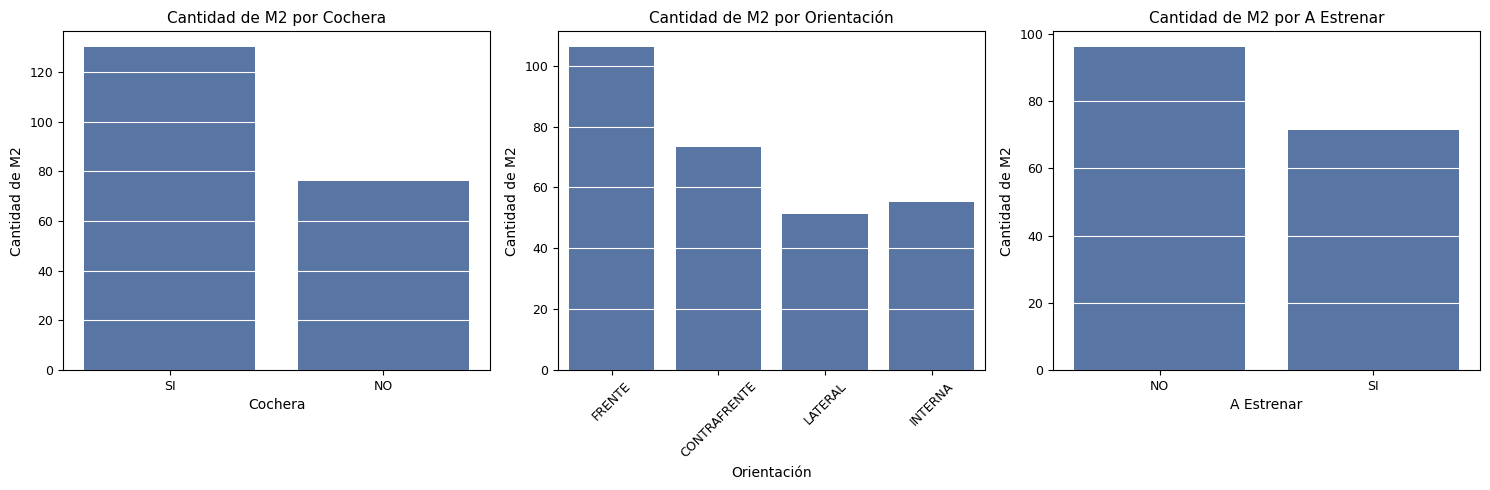

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

color = sns.color_palette("deep")[0]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(data=df, x='Cochera', y='Cantidad de M2', estimator='mean', ci=None, ax=axes[0], color=color)
axes[0].set_title('Cantidad de M2 por Cochera', fontsize=11)
axes[0].tick_params(axis='both', which='both', labelsize=9)
axes[0].grid(axis='y', color='white')
axes[0].set_xlabel('Cochera', fontsize=10)
axes[0].set_ylabel('Cantidad de M2', fontsize=10)

sns.barplot(data=df, x='Orientación', y='Cantidad de M2', estimator='mean', ci=None, ax=axes[1], color=color)
axes[1].set_title('Cantidad de M2 por Orientación', fontsize=11)
axes[1].tick_params(axis='x', labelrotation=45, labelsize=9)
axes[1].tick_params(axis='y', labelsize=9)
axes[1].grid(axis='y', color='white')
axes[1].set_xlabel('Orientación', fontsize=10)
axes[1].set_ylabel('Cantidad de M2', fontsize=10)

sns.barplot(data=df, x='A Estrenar', y='Cantidad de M2', estimator='mean', ci=None, ax=axes[2], color=color)
axes[2].set_title('Cantidad de M2 por A Estrenar', fontsize=11)
axes[2].tick_params(axis='both', which='both', labelsize=9)
axes[2].grid(axis='y', color='white')
axes[2].set_xlabel('A Estrenar', fontsize=10)
axes[2].set_ylabel('Cantidad de M2', fontsize=10)

plt.tight_layout()
plt.show()

Las categorías de estas variables que presentaron mayor precio (presencia de cochera, orientación frontal, propiedades No a Estrenar) se corresponden también con departamentos con (en promedio) mayor metraje.

# *8. Insights*

Tanto de la correlación entre variables como de las distintas visualizaciones desplegadas, puede desprenderse que el tamaño de las propiedades y, correlativo a esto (pero en menor medida), la cantidad de ambientes, son factores influyentes en el precio de las mismas. Sin embargo, el hecho de que esta sumatoria aritmética de metros y/o ambientes suponga un increscendo en el valor de los departamentos solo refrenda algo a priori intuitivo, y esta influencia no se refleja en cambio (tal lo observado en la baja correlación entre Cantidad de M2 y Precio M2) en el valor de cada metro cuadrado. Para esta instancia, deberían considerarse otras variables.

Por otro lado, el valor de las propiedades demostró ser notoriamente superior en ciertas zonas de la capital (Comunas 1, 2, 13 y 14) con diferenciales respecto a las demás comunas de más de 100%. Sin embargo, esas diferencias se plasman mucho más marcadamente entre las propiedades grandes, decreciendo cuanto más chicas. El factor dimensional juega un rol influyente, incluso en el impacto de otras variables.

Pasando a otros factores, la orientación frontal y, especialmente, la presencia de cochera, demostraron ser factores de valorización de los departamentos, en mucha mayor medida que el hecho de ser “A Estrenar”. Esto último podría deberse a que los departamentos nuevos suelen tener algunas dificultades edilicias que se plasman durante la residencia de los primeros inquilinos.

Ahora bien: nuevamente, al segmentar según Dimensión del departamento, el diferencial de estas variables muestra ser mucho mayor en las propiedades grandes y decrecer hacia las medianas, y aún más hacia las chicas.

Como conclusión preliminar, podemos decir que las dimensiones de un departamento son el principal factor en su valorización, en concomitancia con su ubicación, la presencia de cochera y su orientación. Es probable que algunos departamentos grandes no sean (más que proporcionalmente) más valiosos que otros por el mero hecho de su tamaño (lo que pareciera desprenderse de la débil correlación entre Cantidad de M2 y Precio de M2), pero cuando esta variable es asistida por otras condiciones deseables (orientación frontal, presencia de cochera, y probablemente otras variables ausentes en este dataset), parecen definir un perfil de propiedad muy bien valorada en el mercado. No es solo el tamaño, ni solo la ubicación o la presencia de ciertas amenities, sino la concurrencia de varias de esas variables (en sus categorías mejor consideradas) las que potencian el valor inmobiliario en sus unidades mejor consideradas.


# *9. Preparación del dataframe para trabajar con Machine Learning*

# *9.1 Nueva preselección*

En este caso borraremos columnas categóricas que no aportan información por ser sus valores funcionales de variables numéricas: 'Cotización' (es función de 'Precio M2') y 'Dimensión' (es función de 'Cantidad de M2'). Asimismo, se omitirá 'Precio M2', al ser casi trivialmente correlativa al funcionamiento combinado de 'Precio' y 'Cantidad de M2', quedando reservada para análisis futuros en calidad de variable objetivo.

In [ ]:
import pandas as pd

columnas_seleccionadas = ['Cantidad de M2', 'Precio', 'Ambientes', 'A Estrenar', 'Orientación', 'Cochera', 'Comuna', 'Zona']
df_seleccion = df[columnas_seleccionadas].copy()

df_seleccion.head()

,Cantidad de M2,Precio,Ambientes,A Estrenar,Orientación,Cochera,Comuna,Zona
0,350,880000,4,NO,FRENTE,SI,14,NORTE
1,200,545000,5,NO,FRENTE,SI,14,NORTE
2,350,1490000,5,NO,FRENTE,SI,14,NORTE
3,255,780000,5,NO,FRENTE,SI,14,NORTE
4,200,1100000,4,NO,FRENTE,SI,13,NORTE


# *9.2 Adecuación de variables categóricas*
Hecha esta preselección para ahorrar procesamiento innecesario de antemano (eventualmente, estas columnas debían suprimirse a efectos de un buen funcionamiento del modelo), es pertinente adecuar las variables categóricas para poder utilizarlas en los modelos a desarrollar. Para ello, se recurre a la técnica de One Hot Encoding, generando nuevas columnas binarias en base a cada categoría de las variables en cuestión.


In [ ]:
import pandas as pd

variables_categoricas = ['A Estrenar', 'Orientación', 'Cochera', 'Comuna', 'Zona']
df_seleccion = pd.get_dummies(df_seleccion, columns=variables_categoricas)

df_seleccion.head()

<ipython-input-30-ebefc8acb076>:4: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_seleccion = pd.get_dummies(df_seleccion, columns=variables_categoricas)


,Cantidad de M2,Precio,Ambientes,A Estrenar_NO,A Estrenar_SI,Orientación_CONTRAFRENTE,Orientación_FRENTE,Orientación_INTERNA,Orientación_LATERAL,Cochera_NO,...,Comuna_9,Comuna_10,Comuna_11,Comuna_12,Comuna_13,Comuna_14,Comuna_15,Zona_CENTRO,Zona_NORTE,Zona_SUR
0,350,880000,4,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,200,545000,5,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,350,1490000,5,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,255,780000,5,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,200,1100000,4,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


Ahora bien: la utilización de One Hot Encoding genera columnas por cada categoría de las variables originales, lo que puede implicar problemas de multicolinealidad, afectando la estabilidad del modelo y pudiendo resultar en coeficientes inestables o inflados. Por lo tanto, se procede a eliminar una categoría en cada caso, lo cual no supone problemas dado que, si sabemos el valor de todas las variables dummy excepto una, automáticamente sabemos el valor de esa otra variable.



In [ ]:
df_seleccion = df_seleccion.drop(columns=['A Estrenar_NO', 'Cochera_NO', 'Orientación_INTERNA', 'Zona_CENTRO', 'Comuna_10'])

In [ ]:
df_seleccion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8979 entries, 0 to 8978
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Cantidad de M2            8979 non-null   int64
 1   Precio                    8979 non-null   int64
 2   Ambientes                 8979 non-null   int64
 3   A Estrenar_SI             8979 non-null   uint8
 4   Orientación_CONTRAFRENTE  8979 non-null   uint8
 5   Orientación_FRENTE        8979 non-null   uint8
 6   Orientación_LATERAL       8979 non-null   uint8
 7   Cochera_SI                8979 non-null   uint8
 8   Comuna_1                  8979 non-null   uint8
 9   Comuna_2                  8979 non-null   uint8
 10  Comuna_3                  8979 non-null   uint8
 11  Comuna_4                  8979 non-null   uint8
 12  Comuna_5                  8979 non-null   uint8
 13  Comuna_6                  8979 non-null   uint8
 14  Comuna_7                  8979 non-null 

# *9.3 Normalización de las variables*

Entre las variables que eran originalmente numéricas, se presentan escalas divergentes (pesos, metros cuadrados, entre otras) según el tópico del que tratan. Para un mejor procesamiento al ejecutar el modelo, sería oportuno ajustar todas bajo una misma escala sustituta. En este caso, se optará por una que arroje valores positivos entre 0 y 1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

normaliza = MinMaxScaler()
df_seleccion[df_seleccion.columns] = normaliza.fit_transform(df_seleccion[df_seleccion.columns])

df_seleccion.head()

,Cantidad de M2,Precio,Ambientes,A Estrenar_SI,Orientación_CONTRAFRENTE,Orientación_FRENTE,Orientación_LATERAL,Cochera_SI,Comuna_1,Comuna_2,...,Comuna_7,Comuna_8,Comuna_9,Comuna_11,Comuna_12,Comuna_13,Comuna_14,Comuna_15,Zona_NORTE,Zona_SUR
0,0.405,0.163,0.333,0.000,0.000,1.000,0.000,1.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000
1,0.226,0.099,0.444,0.000,0.000,1.000,0.000,1.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000
2,0.405,0.280,0.444,0.000,0.000,1.000,0.000,1.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000
3,0.292,0.144,0.444,0.000,0.000,1.000,0.000,1.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000
4,0.226,0.205,0.333,0.000,0.000,1.000,0.000,1.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000


# *10. Evaluación del Modelo*

# *10.1 Segmentación y agrupamiento: variables independientes y variables objetivo*

Llegado este punto, se procede a agrupar las que serán las variables predictoras del modelo (representadas en X) y la variable objetivo 'Precio'.

In [ ]:
X = df_seleccion.drop(['Precio'], axis=1)
y = df_seleccion['Precio']

In [ ]:
X.head()

,Cantidad de M2,Ambientes,A Estrenar_SI,Orientación_CONTRAFRENTE,Orientación_FRENTE,Orientación_LATERAL,Cochera_SI,Comuna_1,Comuna_2,Comuna_3,...,Comuna_7,Comuna_8,Comuna_9,Comuna_11,Comuna_12,Comuna_13,Comuna_14,Comuna_15,Zona_NORTE,Zona_SUR
0,0.405,0.333,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000
1,0.226,0.444,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000
2,0.405,0.444,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000
3,0.292,0.444,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000
4,0.226,0.333,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000


In [ ]:
y.head()

0   0.163
1   0.099
2   0.280
3   0.144
4   0.205
Name: Precio, dtype: float64

# *10.2 Forward Selection*

Procedamos ahora a evaluar si todas las variables con las que contamos llegado este punto son realmente pertinentes, o bien debería quitarse alguna en aras de un procesamiento más dinámico y de mejor calidad.

In [ ]:
import statsmodels.api as sm

def forward_selection(data, target, significance_level=0.01):
    variables = data.columns.tolist()
    variables_utiles = []
    while (len(variables) > 0):
        remaining_features = list(set(variables) - set(variables_utiles))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[variables_utiles + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if min_p_value < significance_level:
            variables_utiles.append(new_pval.idxmin())
        else:
            break
    return variables_utiles

y_var = forward_selection(X, y)
print("Variables de interés para 'y' (Precio):", y_var)

<ipython-input-37-f3707b5ae7d1>:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-37-f3707b5ae7d1>:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-37-f3707b5ae7d1>:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-37-f3707b5ae7d1>:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-37-f3

Variables de interés para 'y' (Precio): ['Cantidad de M2', 'Cochera_SI', 'Ambientes', 'Comuna_13', 'Comuna_14', 'Comuna_1', 'Comuna_2', 'A Estrenar_SI', 'Zona_SUR', 'Comuna_7', 'Orientación_LATERAL']


Llegada esta instancia, más allá del énfasis en ciertas categorías, todas las variables en consideración son pertinentes.

# *10.3 Separación en grupos de entrenamiento y evaluación*

Para cotejar la capacidad predictiva del modelo, es menester separar el dataframe en dos grupos: uno para el entrenamiento en sí del modelo, y el otro para evaluar su rendimiento.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (6285, 23)
X_test: (2694, 23)
y_train: (6285,)
y_test: (2694,)


# *10.4 Elección de Algoritmo de Machine Learning*

Siendo que la variable objetivo es numérica/cuantitativa, sería pertinente utilizar un algoritmo de Regresión para intentar predecir el valor de los departamentos en función de las variables predictoras bajo consideración. La idea es reconocer las estructuras y relaciones inmanentes al conjunto de datos para obtener conclusiones sobre la distribución de los precios de las propiedades.

In [ ]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

# *10.5 Análisis de Coeficientes*

In [ ]:
coeficientes = modelo.coef_

import pandas as pd
coeficientes_df = pd.DataFrame({'Variable': X_train.columns, 'Coefficient': coeficientes})
coeficientes_df_ordenados = coeficientes_df.reindex(coeficientes_df['Coefficient'].abs().sort_values(ascending=False).index)

print(coeficientes_df_ordenados)

print('Intercepción: ' , modelo.intercept_)

                    Variable  Coefficient
0             Cantidad de M2        0.449
1                  Ambientes       -0.034
7                   Comuna_1        0.013
6                 Cochera_SI        0.013
18                 Comuna_13        0.013
17                 Comuna_12       -0.009
13                  Comuna_7       -0.008
14                  Comuna_8       -0.007
22                  Zona_SUR       -0.007
2              A Estrenar_SI        0.007
20                 Comuna_15       -0.007
21                Zona_NORTE        0.007
19                 Comuna_14        0.006
8                   Comuna_2        0.004
16                 Comuna_11        0.004
10                  Comuna_4       -0.003
5        Orientación_LATERAL        0.003
9                   Comuna_3       -0.002
3   Orientación_CONTRAFRENTE       -0.001
12                  Comuna_6       -0.001
11                  Comuna_5        0.000
4         Orientación_FRENTE        0.000
15                  Comuna_9      

# *10.6 Métricas*

A efectos de validar en cierta medida el modelo, es deseable analizar algunas métricas relativas al algoritmo utilizado. A saber:

Error Cuadrático Medio (RMSE): representa a la raíz cuadrada de la distancia cuadrada promedio entre el valor real y el valor pronosticado.
Indica el ajuste absoluto del modelo a los datos, cuán cerca están los puntos de datos observados de los valores predichos del modelo.

R2: bondad del modelo, expone qué tan bien las variables predictoras explican la variabilidad de la  dependiente. Arroja valores entre 0 y 1.


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

RMSE_train = mean_squared_error(y_train, y_pred_train)
RMSE_test = mean_squared_error(y_test, y_pred_test)

R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred_test)

print("MSE Train:", RMSE_train)
print("MSE Test:", RMSE_test)
print("R2 Train:", R2_train)
print("R2 Test:", R2_test)

MSE Train: 0.0009080347078873041
MSE Test: 0.0007434728410237015
R2 Train: 0.6362357285367829
R2 Test: 0.7015201887081566


# *10.7 Conclusiones en base a los resultados obtenidos*

He aquí algunas observaciones basadas en los coeficientes:

Cantidad de M2: la cantidad de metros cuadrados manifiesta una influencia positiva considerable en el precio de las propiedades. Por cada aumento de una unidad en la cantidad de metros cuadrados, el precio aumenta en aproximadamente 0.449 unidades.

Ambientes: llamativamente, los ambientes se plasman con una muy leve influencia negativa, en la que el precio disminuye en aproximadamente 0.034 unidades por unidad.

Cochera_SI y A Estrenar_SI: La presencia de cochera y que la propiedad sea a estrenar tienen una influencia positiva en el precio. Por cada propiedad que tenga cochera, el precio aumenta en aproximadamente 0.013 unidades, y por cada propiedad que sea a estrenar, el precio aumenta en aproximadamente 0.007 unidades. Esto refrenda lo analizado previamente en el EDA.

Comuna y Zona: Algunas comunas y zonas tienen influencia positiva o negativa en el precio. Por ejemplo, Comuna_1, Comuna_13, y Zona_NORTE tienen una influencia positiva en el precio, mientras que Comuna_12, Comuna_8, y Zona_SUR tienen una influencia negativa. Nuevamente, se refuerzan tendencias previstas en el EDA.

Orientación: Las diferentes orientaciones parecen tener una influencia bastante baja en el precio, con coeficientes cercanos a cero.

Intercepción: la ordenada al orgen del modelo está cerca de cero, lo que indica que cuando todas las variables son cero (o su valor base), el precio también es cercano a cero. Llama la atención que el susodicho valor sea negativo, pero esto podría atribuirse a las transformaciones aplicadas en la normalización. En todo caso, aunque denota alguna irregularidad en el modelo, es demasiado ínfimo como para sacar conclusiones demasiado fatalistas.

Con respecto a las Métricas:

El Error Cuadrático Medio arroja valores muy bajos tanto para el conjunto de entrenamiento (0.000908) como para el de testing (0.000743).

Por su parte, el R2 es significativamente mayor a cero tanto en el conjunto de entrenamiento como para el de testing. Este último denota un valor de 0.702, del cual se deriva que un considerable 70,2% de la variabilidad en el Precio de las propiedades se explica gracias al modelo al aplicarse a nuevos datos.

Cotejando ambos grupos, el MSE en el conjunto de entrenamiento (0.000908) es ligeramente mayor que el MSE en el conjunto de prueba (0.000743). Esto sugiere que el modelo generaliza bien a datos nuevos y no ha sobreajustado significativamente los datos de entrenamiento.

El R^2 en el conjunto de prueba es 0.702, lo que sugiere que aproximadamente el 70.2% de la variabilidad en la variable dependiente es explicada por el modelo cuando se aplica a nuevos datos.

Como conclusión general, el modelo ha mostrado un buen rendimiento y un bajo nivel de error, reflejando una capacidad predictora atendible respecto a la variable objetivo.



# *10.8 Identificación de Overfitting o Underfitting*

Para analizar si un modelo está sufriendo de overfitting o underfitting, sería idóneo comparar el desempeño del modelo en el conjunto de entrenamiento y en el conjunto de prueba.

Tratándose el modelo de una regresión lineal, la evaluación de ajuste no pasará por herramientas como la matriz de confusión, sino por el cotejo de las métricas de Error Cuadrático Medio y el Coeficiente de Determinación R2 en sendos conjuntos.

Antes de acometer el análisis, es pertinente tener en cuenta qué debe esperarse de este análisis:

_ El overfitting suele plasmarse con resultados superiores (menor error y mayor R2) en el conjunto de entrenamiento que en el de prueba. Esto suele ser así debido a que el modelo hizo demasiado énfasis en detalles específicos de los datos de entrenamiento y es incapaz de generalizar al encontrarse con nuevos datos, o bien por una complejidad exagerada.

_ El underfitting no se manifiesta tanto por un comportamiento inverso al descripto en el overfitting, sino por un rendimiento deficiente tanto en el conjunto de entrenamiento como en el conjunto de prueba (manifestado en un error muy alto y un R2 bajo), lo que indica que el modelo es demasiado simple para capturar la relación subyacente en los datos.

Las métricas arrojadas por este modelo, de un muy aceptable R2 y un excelente nivel de error, llevarían a pensar en una tendencia más vinculada al overfitting que al underfitting. Sin embargo, el RMSE en el conjunto de entrenamiento (0.000908) es ligeramente mayor que el RMSE en el conjunto de prueba (0.000743). Por su parte, el R^2 en el conjunto de entrenamiento es 0.636 (63.6% de la variabilidad en la variable dependiente es explicada por el modelo), el cual, como ya se mencionara más arriba, se incrementa hasta un 0.702 en el conjunto de testeo.

Esto sugiere que el modelo generaliza aceptablemente a datos nuevos y que no se han sobreajustado significativamente los datos de entrenamiento. El hecho de que los datos de entrenamiento no mejoren a los de testeo parece indicar que el modelo no sufre overfitting considerable (cuanto menos, considerable), en tanto los buenos resultados a nivel de error y R2 parecen echar por tierra con un underfitting significativo.

En general, los valores de MSE y R^2 parecieran sugerir que el modelo está bien ajustado y no está experimentando overfitting o underfitting significativos.

Sin embargo, no todo lo observado es positivo. El mejor rendimiento del conjunto de testeo respecto al de entrenamiento es poco común e intuitivo, y podría plantear algunas dudas sobre la consistencia de los datos o bien del modelo. Podría darse el caso de que, si bien la muestra parece abarcar un tamaño adecuado (de más de 8000 casos), al separar en conjuntos de entrenamiento y testing la misma no sea suficiente para lograr una adecuada representatividad, generando divergencias entre ambos.

Sea esta u otra la causalidad, debería indagarse qué provoca esta situación anómala en la que las métricas de testeo sobrepasan el rendimiento de las de entrenamiento.

Para profundizar este análisis, podría ser de interés evaluar el Error Absoluto Medio (MAE). Este marca la diferencia absoluta entre el valor objetivo y el valor predicho por el modelo, y es  menos sensible a los valores atípicos en los datos que el RMSE, ya que no eleva los errores al cuadrado antes de promediarlos. Huelga decir que cuanto más bajo sea este valor, mejor será el rendimiento del modelo, indicando que las predicciones del modelo están, en promedio, más bien cerca de los valores reales.


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

def compare_errors(estimator, X_train, y_train, X_test, y_test):
    estimator.fit(X_train, y_train)
    y_train_pred = estimator.predict(X_train)
    y_test_pred = estimator.predict(X_test)

    train_error = np.mean(np.abs(y_train_pred - y_train))
    test_error = np.mean(np.abs(y_test_pred - y_test))

    print("Train error:", train_error)
    print("Test error:", test_error)

estimator = LinearRegression()
compare_errors(estimator, X_train, y_train, X_test, y_test)

Train error: 0.013647634176016768
Test error: 0.012943885983325494


Se refrendan los patrones observados más arriba. El error absoluto medio (MAE) obtenido (0.0136 para el conjunto de entrenamiento, 0.0129 para el conjunto de testing) es bastante bajo, lo que sugiere que el modelo tiene un buen rendimiento en ambos conjuntos de datos.

Nuevamente, el nivel de error en el conjunto de entrenamiento no supera al de testeo, lo que sugiere que el modelo está generalizando bien a nuevos datos y no está sobreajustando los datos de entrenamiento, lo que parece denotar que el modelo puede ser útil para hacer predicciones en nuevos datos.

Asimismo, vuelve a plantearse el mismo reparo: por un leve margen, el conjunto de testeo mejora al de entrenamiento, lo cual es poco intuitivo. Queda sujeto a revisión hallar en qué instancia se produce esta leve inconsistencia, bien en la representatividad de los conjuntos formados o en alguna instancia de la construcción del modelo.

# *11. Anexo*

#####Aclaración: Objetivo, Contexto Comercial y Problema Comercial son análogos a los de la primera etapa del proyecto.

# *11.1 Data Acquisition*


Como primera instancia, se importan algunas librerías que, presumiblemente, serán pertinentes en los pasos siguientes.

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import zipfile
import os
import matplotlib.pyplot as plt

Realizados ya los debidos pasos de registración en su sitio web, se procede a configurar las credenciales necesarias para conectarse a la API de Kaggle, una plataforma en línea oferente de diversos recursos para personas interesadas en Data Science, aprendizaje automático y disciplinas afines.

In [ ]:
api_token = {"username":"juangabrielaparicio","key":"942015008f14ae03dbd2d39d0c321fd7"}

os.environ['KAGGLE_USERNAME']=api_token["username"]
os.environ['KAGGLE_KEY']=api_token["key"]

Hecho esto, instalamos la biblioteca de Kaggle utilizando el sistema de gestión de paquetes de python, que proporcionará una interfaz para interactuar con la susodicha plataforma.







In [ ]:
!pip install kaggle

Siendo el tópico de la investigación el estudio del mercado inmobiliario, podría ser de interés filtrar los datasets de Kaggle con el vocablo "Propiedad", en aras de constatar si surge alguno asimilable al trabajado hasta aquí.

In [ ]:
!kaggle datasets list -s "propiedad"

ref                                                          title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
luisfelipetn/valor-casas-usadas-chile-rm-08032023            Valor Casas Usadas, Chile, RM, 18/07/2023          575KB  2023-07-18 22:09:04            686         17  1.0              
erik172/bogota-apartments                                    Bogota Apartments                                   20MB  2024-04-07 08:31:52            496         13  1.0              
gorkigonzalez/casas-usadas-rm-chile-mayo-2020                Valor Casas Usadas Región Metropolitana Chile      206KB  2020-08-15 04:15:15           1963         30  0.88235295       
thedevastator/propiedades-en-ecuador-detalles                Propiedades en Ecua

Llama la atención un dataset que alude a propiedades y a "Argentina". Se procede a descargarlo.

In [ ]:
!kaggle datasets download -d juanmartnrodrguez/argentina-dataset-propiedades

 99% 251M/255M [00:02<00:00, 139MB/s]
100% 255M/255M [00:02<00:00, 110MB/s]


Hecho esto, se descomprime el archivo.

In [ ]:
zip_file_path = "/content/argentina-dataset-propiedades.zip"

extract_to_dir = "/content/argentina-dataset-propiedades"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_dir)

files = os.listdir(extract_to_dir)
print(files)

['ar_properties.csv']


Para un tratamiento facilitado a través del lenguaje Python con el que se viene trabajando, se carga el archivo .csv obtenido en un dataframe de pandas. Asimismo, se extraen sus primeras filas para una primera aproximación a su contenido, y a dirimir si podría ser de utilidad en algún aspecto.

In [ ]:
csv_file_path = os.path.join(extract_to_dir, files[0])

df2 = pd.read_csv(csv_file_path, encoding='latin1')

print(df2.head())

                         id    ad_type  start_date    end_date  created_on  \
0  wdQ5hWhv8P14T7Sh9g4QCg==  Propiedad  2020-12-25  9999-12-31  2020-12-25   
1  nnMBYZ4RMRY+vm753EtA+g==  Propiedad  2020-12-25  9999-12-31  2020-12-25   
2  +dnVA1K6JxzL1zAjOEQ1pA==  Propiedad  2020-12-25  2020-12-29  2020-12-25   
3  dLHXKN5/sRZpm9Yk0yI2nA==  Propiedad  2020-12-25  2020-12-29  2020-12-25   
4  wtw/k887EPipd37UYHKb1Q==  Propiedad  2020-12-25  9999-12-31  2020-12-25   

         lat        lon         l1                        l2        l3  ...  \
0 -32.716652 -68.642692  Argentina                   Mendoza       NaN  ...   
1 -24.797723 -65.467514  Argentina                     Salta       NaN  ...   
2 -34.919373 -58.020591  Argentina    Bs.As. G.B.A. Zona Sur  La Plata  ...   
3 -34.919455 -58.024807  Argentina    Bs.As. G.B.A. Zona Sur  La Plata  ...   
4 -34.364924 -58.783143  Argentina  Bs.As. G.B.A. Zona Norte   Escobar  ...   

  bathrooms surface_total  surface_covered  price  curre

El dataset en cuestión parece prometedor en cuanto a la posibilidad de habilitar algún análisis complementario del hasta aquí realizado, en particular si previamente se realizaran algunos filtrados en variables puntuales. Realicemos algunos análisis preliminares.

# *11.2 Exploratory Data Analysis (EDA)*



# *11.2.1 Exploración del dataset*


Recién contemplamos que el dataframe obtenido consta de 25 columnas. Indaguemos cuántas filas tiene.

In [ ]:
filas = df2.shape[0]

print("Cantidad de filas:", filas)

Cantidad de filas: 1000000


Observemos ahora cómo están etiquetadas sus columnas, y sus tipos de datos.

In [ ]:
columnas = df2.columns

print("Columnas del DataFrame:", columnas)

Columnas del DataFrame: Index(['id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon',
       'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'currency', 'price_period',
       'title', 'description', 'property_type', 'operation_type'],
      dtype='object')


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1000000 non-null  object 
 1   ad_type          1000000 non-null  object 
 2   start_date       1000000 non-null  object 
 3   end_date         1000000 non-null  object 
 4   created_on       1000000 non-null  object 
 5   lat              849189 non-null   float64
 6   lon              848255 non-null   float64
 7   l1               1000000 non-null  object 
 8   l2               1000000 non-null  object 
 9   l3               946673 non-null   object 
 10  l4               239496 non-null   object 
 11  l5               5001 non-null     object 
 12  l6               0 non-null        float64
 13  rooms            526423 non-null   float64
 14  bedrooms         466213 non-null   float64
 15  bathrooms        776733 non-null   float64
 16  surface_total    37

Nuestros datos originales abarcan el período del año calendario 2015. Sería menester conocer el abarcado en este dataset, y tal información podría extraerse de la columna 'start_date' indicativa de la fecha de publicación.

In [ ]:
df2['start_date'].min()

'2019-12-22'

In [ ]:
df2['start_date'].max()

'2021-01-14'

De lo recabado, sabemos que las propiedades publicadas abarcan el período entre el 22 de diciembre de 2019 y el 14 de enero de 2021.

# *11.2.2 Evaluación de variables*


Procedamos ahora a analizar la composición de las columnas categóricas, para indagar hasta qué punto son pertinentes o bien deberían eliminarse. Asimismo, podríamos considerar filtrar la base de datos para asimilarla a la trabajada anteriormente.

In [ ]:
df2['ad_type'].unique()

array(['Propiedad'], dtype=object)

In [ ]:
df2['l1'].unique()

array(['Argentina', 'Uruguay', 'Estados Unidos', 'Brasil'], dtype=object)

In [ ]:
df2['l2'].unique()

array(['Mendoza', 'Salta', 'Bs.As. G.B.A. Zona Sur',
       'Bs.As. G.B.A. Zona Norte', 'Capital Federal',
       'Buenos Aires Interior', 'CÃ³rdoba', 'Santa Fe',
       'Buenos Aires Costa AtlÃ¡ntica', 'NeuquÃ©n', 'RÃ\xado Negro',
       'Bs.As. G.B.A. Zona Oeste', 'TucumÃ¡n', 'Corrientes', 'Maldonado',
       'Chubut', 'Colonia', 'Canelones', 'Florida', 'Montevideo', 'Chaco',
       'La Pampa', 'San Juan', 'Santa Catarina', 'San Luis',
       'Entre RÃ\xados', 'Misiones', 'Santa Cruz', 'Santiago Del Estero',
       'Michigan', 'Tierra Del Fuego', 'Miami', 'Jujuy', 'Formosa',
       'Catamarca', 'Rocha', 'Rio Grande do Norte', 'Rio de Janeiro',
       'La Rioja', 'Maryland', 'Pennsylvania', 'SÃ£o Paulo', 'New York'],
      dtype=object)

In [ ]:
df2['l3'].unique()

array([nan, 'La Plata', 'Escobar', ..., 'Ingeniero Chanourdie', 'Charata',
       'Arata'], dtype=object)

In [ ]:
df2['l4'].unique()

array([nan, 'La Plata', 'BelÃ©n de Escobar', ..., 'Villa Montoro',
       'RamÃ³n Santamarina', 'Barrio Cerrado "Pilar House"'], dtype=object)

In [ ]:
df2['l5'].unique()

array([nan, 'Barrio El Golf', 'Barrio La Isla', 'BarrioPortezuelo',
       'Barrio Lagos del Golf 1', 'Barrio Las Glorietas',
       'Barrio Los Tilos', 'Barrio Los Alisos', 'Barrio Los Castores',
       'Barrio Barrancas del Lago', 'Barrio Las Caletas',
       'Islas del Canal', 'Barrio Los Sauces', 'Barrio Los Lagos',
       'Barrio La Alameda', 'Barrio El Yacht', 'Barrio Lagos del Golf 2',
       'QBay Yacht', 'Barrio Cabos del Lago', 'Enyoi',
       'Barrio Residencial Pacheco 2', 'Barrio Residencial Pacheco 1'],
      dtype=object)

In [ ]:
df2['l6'].unique()

array([nan])

In [ ]:
df2['currency'].unique()

array([nan, 'ARS', 'USD', 'UYU', 'PEN'], dtype=object)

In [ ]:
df2['title'].unique()

array(['Excelentes Lotes Sobre Ruta 34',
       'TERRENO + VENTA + JARDINES DE SAN LORENZO +1500 M2',
       'Lote en Venta de 1000 m2 en La Plata', ...,
       'Apartamento en ALQUILER 2 dormitorios - CordÃ³n:',
       'Apartamento alquiler a estrenar 2 dormitorios Aguada',
       'Apartamento para entrar, en Punta Gorda, a metros ramblam 2d t servicio, garaje'],
      dtype=object)

In [ ]:
df2['description'].unique()

array(['Corredor Responsable: VICTOR E. MONTIVERO - C.C.P.I.M 783Contacto: Cristian Pivac - MLS ID # 420921079-17Remax Vende !!! Excelentes Lotes  Ubicados Sobre la Ruta 34 Km 6 de Lavalle Mendoza,  El Loteo se encuentra en Pleno desarrollo con varias viviendas construidas y un Excelente entorno y UbicaciÃ³n, ya que los mismos se encuentran a pocos Kms de la Ruta Nacional 40 y a solo 25 minutos del Centro de Mendoza y cercanÃ\xadas de la Plaza Principal de Lavalle, Lineas de colectivos en la puerta del loteo, los mismos cuentan con Agua de Pozo y Luz, Consulte por otras Unidades!!!! <br><br>Contamos con Fracciones de 350 mts hasta 500  mts.<br><br>No dude en  llamar!!!!!  Muy Buena oportunidad de InversiÃ³n ',
       'Corredor Responsable: Pablo CastaÃ±eda - C.U.C.I.S. Mat. NÂº208Contacto: Alejandro RodrÃ\xadguez - MLS ID # 251049-453<br><br>Terreno plano en venta en Barrio Privado Jardines de San Lorenzo, San Lorenzo Chico, cuenta con 1.540 metros cuadrados. Cuenta con servicios de lu

In [ ]:
df2['property_type'].unique()

array(['Lote', 'Otro', 'Oficina', 'DepÃ³sito', 'Departamento', 'Casa',
       'Casa de campo', 'Cochera', 'Local comercial', 'PH'], dtype=object)

In [ ]:
df2['operation_type'].unique()

array(['Venta', 'Alquiler', 'Alquiler temporal'], dtype=object)

# *11.3 Data Wrangling*


# *11.3.1 Selección de variables*


##### A efectos de obtener un dataframe análogo al de la primera parte proyecto, deben realizarse algunas filtraciones. De lo recabado, se desprende que bien podríamos redefinir el dataframe reteniendo sólo los datos que correspondan a 'Departamentos', ubicados en la Ciudad de Buenos Aires (aquí 'Capital Federal') y en el país 'Argentina', siendo propiedades bajo formato 'Venta', valuadas en dólares.

In [ ]:
df2 = df2[(df2['l2'] == 'Capital Federal') &
                 (df2['operation_type'] == 'Venta') &
                 (df2['currency'] == 'USD') &
                 (df2['property_type'] == 'Departamento') &
                 (df2['l1'] == 'Argentina')]
print(df2.head())

                           id    ad_type  start_date    end_date  created_on  \
94   bWp2N701fvvHQPjvA/HKYw==  Propiedad  2020-12-25  2020-12-27  2020-12-25   
102  106n++u7O+HplGY9FDDOMg==  Propiedad  2020-12-25  9999-12-31  2020-12-25   
103  38qpnvMB+UM7L9ngPGEFSw==  Propiedad  2020-12-25  2021-01-08  2020-12-25   
104  TtClOOQogPSofp1mFwlU+w==  Propiedad  2020-12-25  2021-01-10  2020-12-25   
106  XNX6aTBTjj1chWN4tZjvyw==  Propiedad  2020-12-25  9999-12-31  2020-12-25   

           lat        lon         l1               l2         l3  ...  \
94  -34.566986 -58.433688  Argentina  Capital Federal   Belgrano  ...   
102 -34.584215 -58.411323  Argentina  Capital Federal    Palermo  ...   
103 -34.579094 -58.411517  Argentina  Capital Federal    Palermo  ...   
104 -34.584233 -58.445752  Argentina  Capital Federal    Palermo  ...   
106 -34.613101 -58.401376  Argentina  Capital Federal  Balvanera  ...   

    bathrooms surface_total  surface_covered     price  currency  \
94        Na

Hecho esto, se procede a eliminar variables que no revisten mayor interés para los objetivos de análisis.

In [ ]:
columnas_borrar = ['ad_type','created_on', 'lat', 'lon', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'currency', 'price_period', 'title', 'description', 'property_type', 'operation_type']
df2 = df2.drop(columns=columnas_borrar)
df2.head()

,id,start_date,end_date,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
94,bWp2N701fvvHQPjvA/HKYw==,2020-12-25,2020-12-27,NaN,NaN,NaN,865.0,865.0,23000.0
102,106n++u7O+HplGY9FDDOMg==,2020-12-25,9999-12-31,1.0,NaN,1.0,22.0,19.0,60000.0
103,38qpnvMB+UM7L9ngPGEFSw==,2020-12-25,2021-01-08,1.0,1.0,1.0,30.0,30.0,95000.0
104,TtClOOQogPSofp1mFwlU+w==,2020-12-25,2021-01-10,1.0,NaN,1.0,50.0,34.0,115000.0
106,XNX6aTBTjj1chWN4tZjvyw==,2020-12-25,9999-12-31,1.0,NaN,1.0,29.0,26.0,51000.0


* Aclaración: en principio se dejan las columnas de ID (para evitar el borrado de filas que en realidad no sean duplicados en pasos siguientes) y start_date y end_date, por si fuera de interés algún análisis relativo a la fecha de publicación. Podrían eliminarse en pasos subsiguientes.

# *11.3.2 Renombramiento de variables*


A efectos de un tratamiento más ameno, redefinamos algunas columnas.

In [ ]:
df2 = df2.rename(columns={'start_date': 'fecha_publicacion', 'end_date':'fecha_transaccion','bathrooms':'baños', 'rooms':'ambientes','bedrooms': 'dormitorios', 'surface_total': 'Cantidad_de_M2', 'surface_covered': 'superficie_cubierta', 'price':'precio'})

print(df2.head())

                           id fecha_publicacion fecha_transaccion  ambientes  \
94   bWp2N701fvvHQPjvA/HKYw==        2020-12-25        2020-12-27        NaN   
102  106n++u7O+HplGY9FDDOMg==        2020-12-25        9999-12-31        1.0   
103  38qpnvMB+UM7L9ngPGEFSw==        2020-12-25        2021-01-08        1.0   
104  TtClOOQogPSofp1mFwlU+w==        2020-12-25        2021-01-10        1.0   
106  XNX6aTBTjj1chWN4tZjvyw==        2020-12-25        9999-12-31        1.0   

     dormitorios  baños  Cantidad_de_M2  superficie_cubierta    precio  
94           NaN    NaN           865.0                865.0   23000.0  
102          NaN    1.0            22.0                 19.0   60000.0  
103          1.0    1.0            30.0                 30.0   95000.0  
104          NaN    1.0            50.0                 34.0  115000.0  
106          NaN    1.0            29.0                 26.0   51000.0  


# *11.3.3 Borrado de duplicados*

In [ ]:
print(df2.shape)
df2= df2.drop_duplicates()
print(df2.shape)

(102978, 9)
(102978, 9)


# *11.3.4 Análisis de nulos*

In [ ]:
serie = (df2.isnull().sum() / df2.shape[0]) * 100
serie = serie.sort_values(ascending=False)
serie = serie[serie > 0]
serie

Cantidad_de_M2         27.092194
superficie_cubierta    26.335722
dormitorios            24.671289
ambientes               6.248908
baños                   4.571850
dtype: float64

<Axes: >

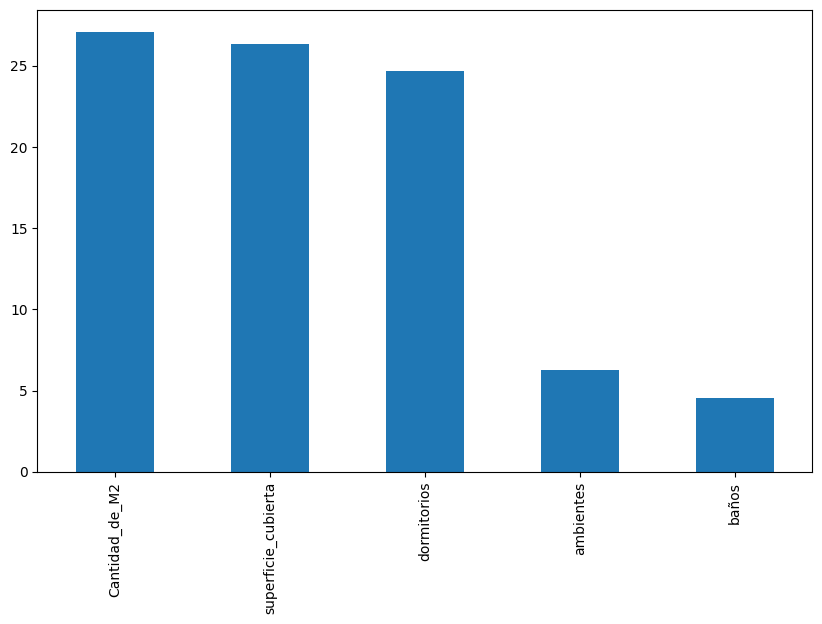

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
serie.plot(kind='bar')

Se observa una importante presencia de nulos (en torno al 25%) en las variables "cantidad de M2", "Superficie Cubierta" y "Dormitorios".

En ningún caso se contempla la posibilidad de gestionar estas variables eliminándolas: todas son muy caras al análisis del proyecto.

Se procederá a interpolarlas, incorporándoles el valor de la mediana general de la columna, para que no afecte los valores totales.

# *11.3.5 Interpolar con la mediana*

In [ ]:
col_inter= ['Cantidad_de_M2','superficie_cubierta','dormitorios', 'ambientes', 'baños', 'precio']
for i in col_inter:
  df2[i] = df2[i].fillna(df2[i].median())

Cotejando que la interpolación haya funcionado

In [ ]:
df2.Cantidad_de_M2.isnull().sum()

0

# *11.3.6 Normalización de las variables*

In [ ]:
from sklearn.preprocessing import StandardScaler

col_inter_numericas = df2[col_inter].select_dtypes(include=['int64', 'float64'])

scaler = StandardScaler()
col_inter_normalizadas = scaler.fit_transform(col_inter_numericas)

df_col_inter_normalizadas = pd.DataFrame(col_inter_normalizadas, columns=col_inter_numericas.columns)

df2_normalizado = pd.concat([df2.drop(columns=col_inter_numericas.columns), df_col_inter_normalizadas], axis=1)

In [ ]:
df2_normalizado.head()

,id,fecha_publicacion,fecha_transaccion,Cantidad_de_M2,superficie_cubierta,dormitorios,ambientes,baños,precio
94,bWp2N701fvvHQPjvA/HKYw==,2020-12-25,2020-12-27,-0.032871,-0.030788,-0.68801,-0.411972,-0.563178,-0.451491
102,106n++u7O+HplGY9FDDOMg==,2020-12-25,9999-12-31,-0.032871,-0.030788,-0.68801,-0.411972,-0.563178,-0.395138
103,38qpnvMB+UM7L9ngPGEFSw==,2020-12-25,2021-01-08,-0.032871,-0.030788,-0.68801,-0.411972,-0.563178,-0.443664
104,TtClOOQogPSofp1mFwlU+w==,2020-12-25,2021-01-10,-0.032871,-0.030788,-0.68801,-0.411972,-0.563178,-0.373223
106,XNX6aTBTjj1chWN4tZjvyw==,2020-12-25,9999-12-31,-0.032871,-0.030788,-0.68801,-0.411972,-0.563178,-0.404530
